Case Study: "Underwriter for a Day"

Tejas Bajaj 11308438
Haotong Sun 11337172
Yilun Yang 11313432 
October 28, 2024

##  1.Risk Group Assignment Algorithm: Develop an algorithm for categorizing new applicants into specific risk groups based on their individual characterisEcs.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load your dataset
claim_data = pd.read_csv('claim_data_group5_2024.csv')

In [ ]:
claim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   IDpol        100000 non-null  float64
 1   ClaimNb      100000 non-null  float64
 2   Exposure     100000 non-null  float64
 3   Area         100000 non-null  object 
 4   VehPower     100000 non-null  float64
 5   VehAge       100000 non-null  float64
 6   DrivAge      100000 non-null  float64
 7   BonusMalus   100000 non-null  float64
 8   VehBrand     100000 non-null  object 
 9   VehGas       100000 non-null  object 
 10  Density      100000 non-null  float64
 11  Region       100000 non-null  object 
 12  ClaimAmount  100000 non-null  float64
dtypes: float64(9), object(4)
memory usage: 9.9+ MB


In [ ]:
claim_data

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,2271893.0,0.0,0.83,E,5.0,17.0,53.0,64.0,B2,Diesel,3317.0,R93,0.0
1,1111864.0,0.0,0.24,E,5.0,2.0,27.0,64.0,B3,Diesel,2740.0,R22,0.0
2,72908.0,0.0,0.50,E,7.0,11.0,67.0,50.0,B3,Regular,4762.0,R93,0.0
3,2283027.0,0.0,0.08,B,5.0,8.0,28.0,60.0,B1,Diesel,64.0,R91,0.0
4,1123838.0,0.0,0.03,A,11.0,1.0,38.0,50.0,B2,Regular,16.0,R24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,70445.0,0.0,1.00,C,5.0,11.0,37.0,56.0,B2,Diesel,317.0,R82,0.0
99996,4163362.0,0.0,0.22,E,6.0,13.0,58.0,50.0,B1,Diesel,4762.0,R93,0.0
99997,2081912.0,0.0,1.00,E,5.0,1.0,49.0,50.0,B2,Diesel,4998.0,R11,0.0
99998,2012998.0,0.0,0.71,D,9.0,9.0,36.0,54.0,B1,Regular,1541.0,R91,0.0


In [ ]:
# Descriptive Statistics for Numerical Columns
descriptive_stats = claim_data.describe()
descriptive_stats

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,2.617735e+06,0.039020,0.528057,6.460230,6.992550,45.483040,59.822980,1800.69569,76.599887
std,1.643394e+06,0.206296,0.364232,2.055641,5.637297,14.154698,15.652541,3955.08311,1531.841302
min,1.500000e+01,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,2.00000,0.000000
25%,1.156127e+06,0.000000,0.170000,5.000000,2.000000,34.000000,50.000000,94.00000,0.000000
50%,2.271008e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,399.00000,0.000000
75%,4.044791e+06,0.000000,0.990000,7.000000,11.000000,55.000000,65.000000,1658.00000,0.000000
max,6.114324e+06,4.000000,1.000000,15.000000,100.000000,99.000000,230.000000,27000.00000,200000.000000


In [ ]:
# Analyzing unique values for categorical columns
categorical_overview = {
    "Area": claim_data["Area"].nunique(),
    "VehBrand": claim_data["VehBrand"].nunique(),
    "VehGas": claim_data["VehGas"].unique(),
    "Region": claim_data["Region"].nunique()
}
categorical_overview

{'Area': 6,
 'VehBrand': 11,
 'VehGas': array(['Diesel', 'Regular'], dtype=object),
 'Region': 22}

In [ ]:
# Distribution of Individual Claims (ClaimNb)
claim_distribution = claim_data['ClaimNb'].value_counts()
claim_distribution

0.0    96335
1.0     3441
2.0      214
3.0        7
4.0        3
Name: ClaimNb, dtype: int64

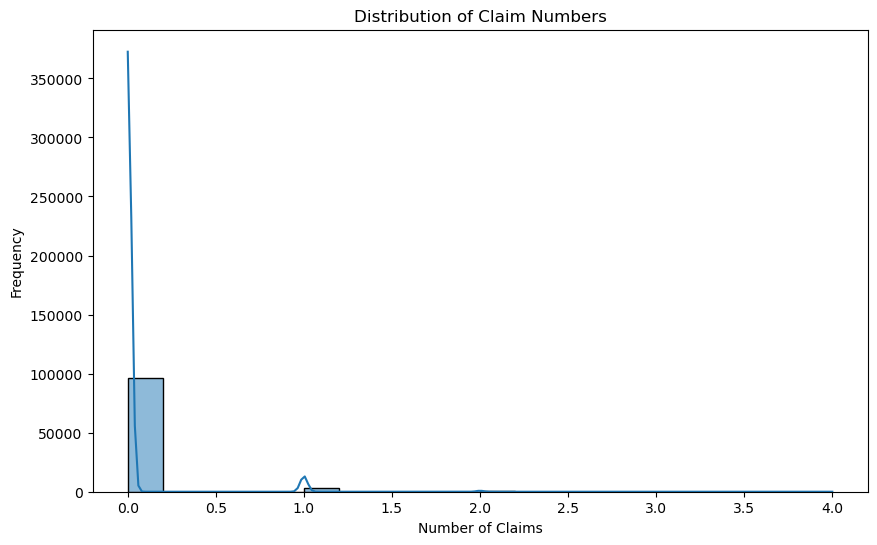

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(claim_data['ClaimNb'], bins=20, kde=True).set_title('Distribution of Claim Numbers')
plt.xlabel('Number of Claims')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Distribution of Claim Amounts (ClaimAmount)
claim_amount_distribution = claim_data['ClaimAmount'].value_counts()
claim_amount_distribution

0.00       96335
1204.00      649
1128.12      398
1172.00      282
1128.00       96
           ...  
2487.55        1
1307.64        1
1858.81        1
741.77         1
1117.64        1
Name: ClaimAmount, Length: 1938, dtype: int64

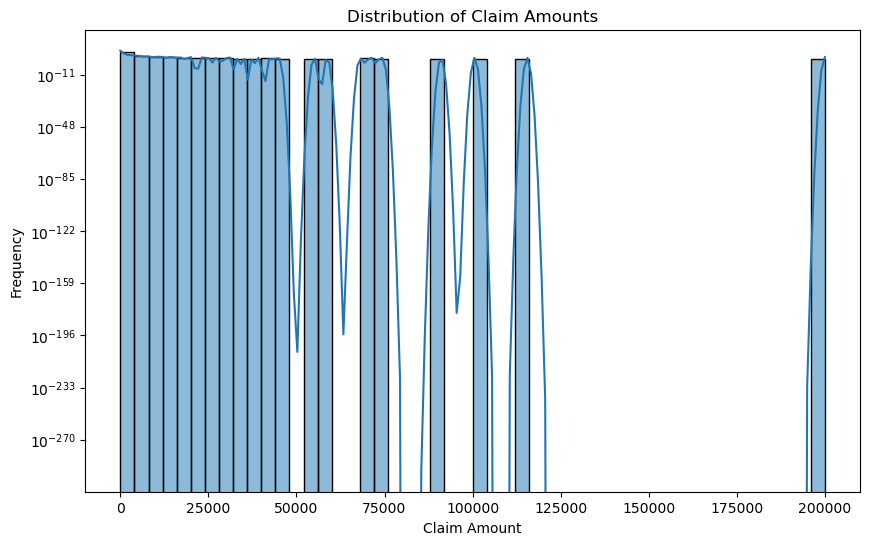

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(claim_data['ClaimAmount'], bins=50, kde=True).set_title('Distribution of Claim Amounts')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.yscale('log') # Using log scale due to large range of values
plt.show()

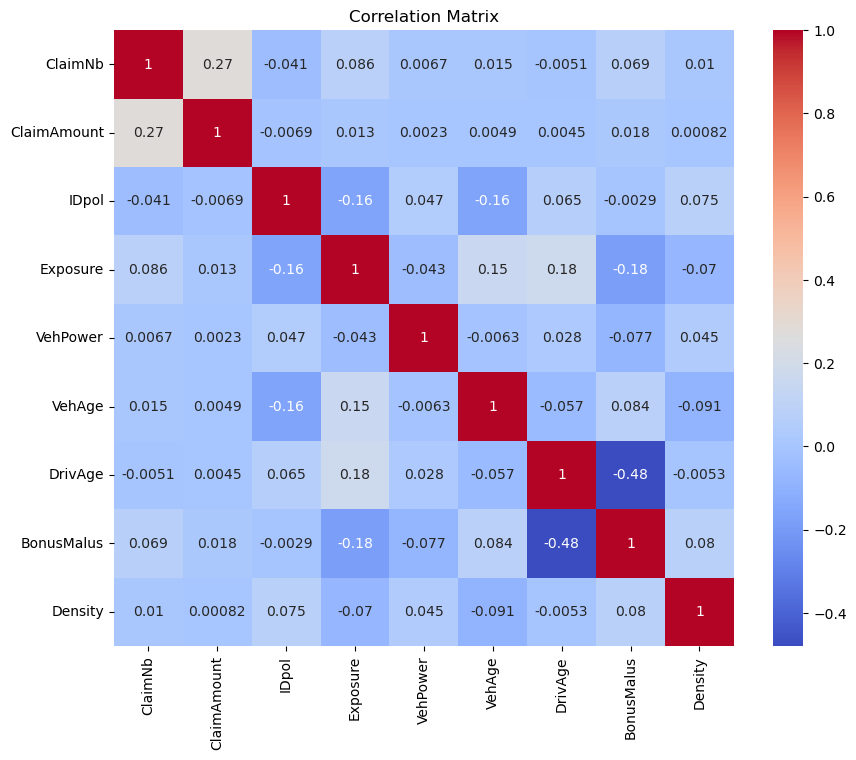

In [ ]:
# Correlation matrix for numerical features
correlation_matrix = claim_data[['ClaimNb', 'ClaimAmount', 'IDpol', 'Exposure', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

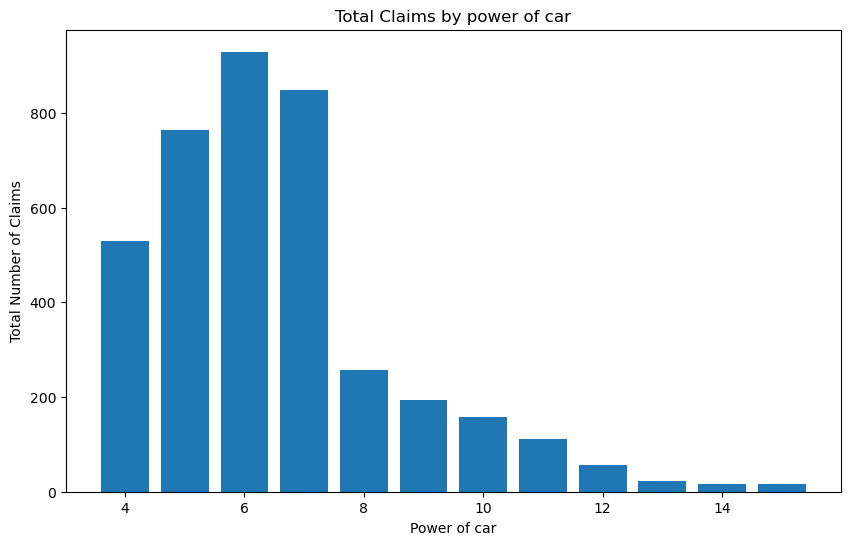

In [ ]:
# Total Claims by power of car (VehPower)
claims_by_power = claim_data.groupby('VehPower')['ClaimNb'].sum().reset_index()

# Plot Claims by power of car
plt.figure(figsize=(10, 6))
plt.bar(claims_by_power['VehPower'], claims_by_power['ClaimNb'])
plt.title('Total Claims by power of car')
plt.xlabel('Power of car')
plt.ylabel('Total Number of Claims')
plt.show()

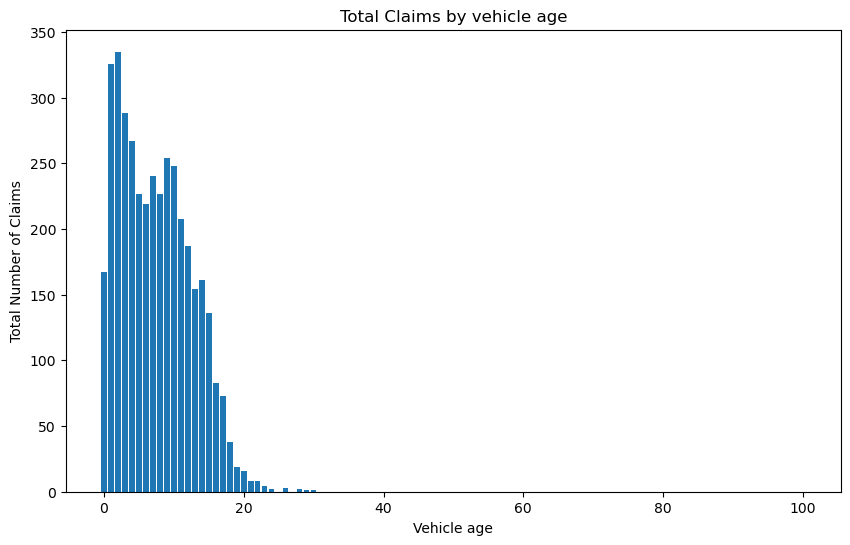

In [ ]:
# Total Claims by vehicle age (VehAge)
claims_by_vehicle_age = claim_data.groupby('VehAge')['ClaimNb'].sum().reset_index()

# Plot Claims by vehicle age
plt.figure(figsize=(10, 6))
plt.bar(claims_by_vehicle_age['VehAge'], claims_by_vehicle_age['ClaimNb'])
plt.title('Total Claims by vehicle age')
plt.xlabel('Vehicle age')
plt.ylabel('Total Number of Claims')
plt.show()

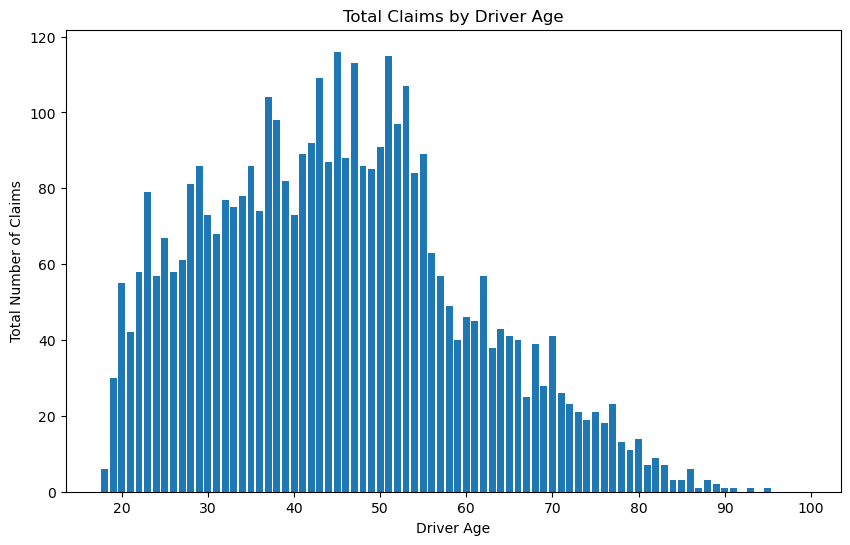

In [ ]:
# Total Claims by Driver's Age (DrivAge)
claims_by_age = claim_data.groupby('DrivAge')['ClaimNb'].sum().reset_index()

# Plot Claims by Driver's Age
plt.figure(figsize=(10, 6))
plt.bar(claims_by_age['DrivAge'], claims_by_age['ClaimNb'])
plt.title('Total Claims by Driver Age')
plt.xlabel('Driver Age')
plt.ylabel('Total Number of Claims')
plt.show()

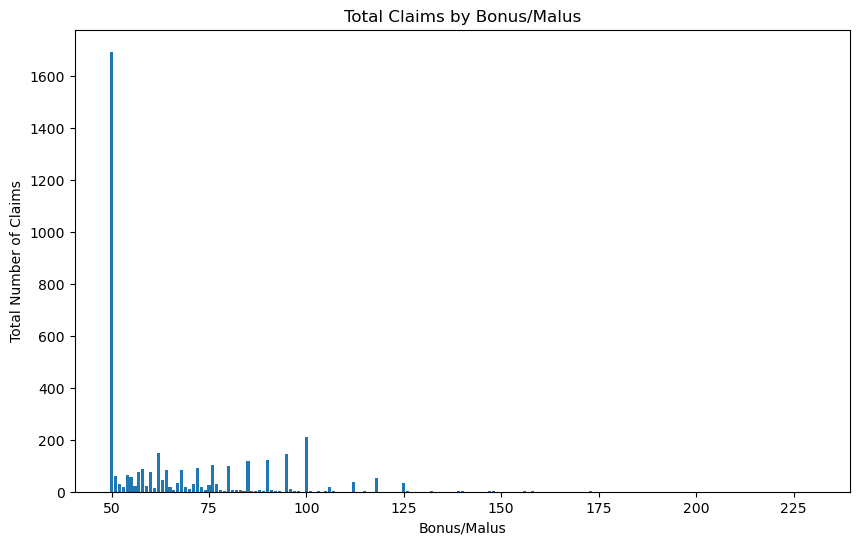

In [ ]:
# Total Claims by BonusMalus
claims_by_bonusmalus = claim_data.groupby('BonusMalus')['ClaimNb'].sum().reset_index()

# Plot Claims by BonusMalus
plt.figure(figsize=(10, 6))
plt.bar(claims_by_bonusmalus['BonusMalus'], claims_by_bonusmalus['ClaimNb'])
plt.title('Total Claims by Bonus/Malus')
plt.xlabel('Bonus/Malus')
plt.ylabel('Total Number of Claims')
plt.show()

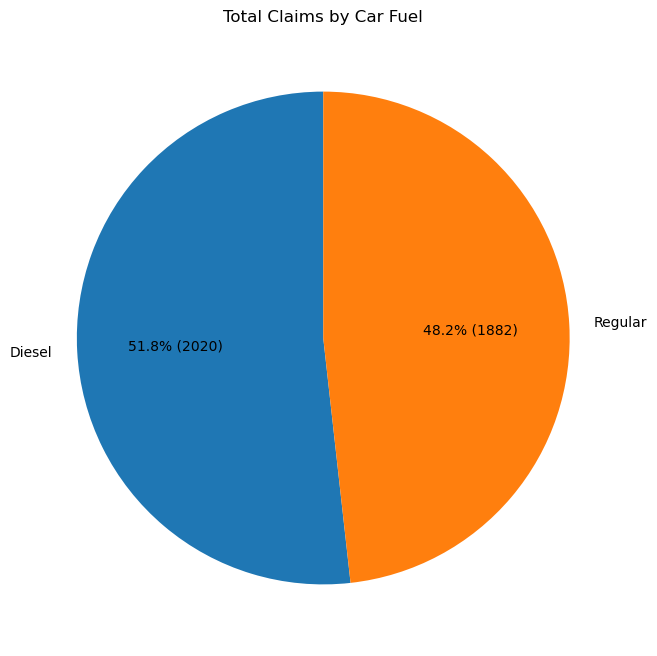

In [ ]:
# Total Claims by car fuel (VehGas)
claims_by_vehgas = claim_data.groupby('VehGas')['ClaimNb'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    claims_by_vehgas['ClaimNb'],
    labels=claims_by_vehgas['VehGas'],
    autopct=lambda pct: f"{pct:.1f}% ({int(pct * claims_by_vehgas['ClaimNb'].sum() / 100)})",
    startangle=90
)

# Adding title
plt.title('Total Claims by Car Fuel')
plt.show()

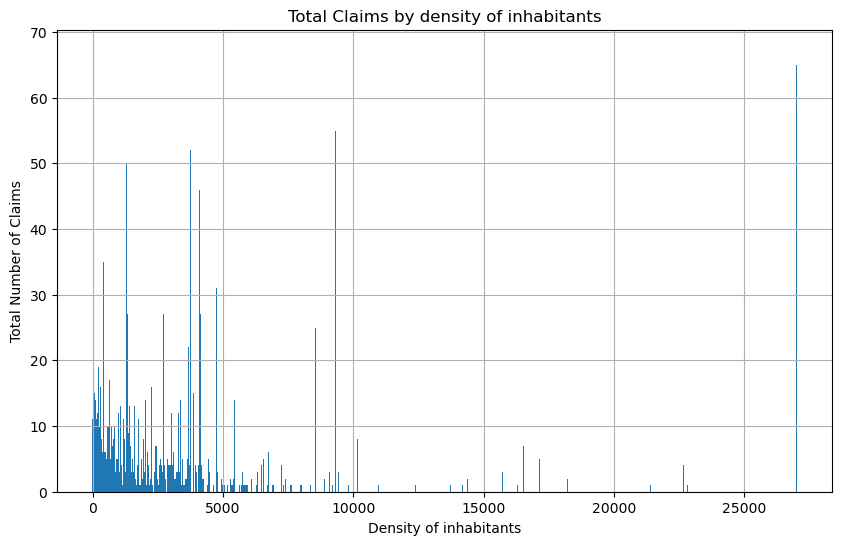

In [ ]:
# Total Claims by density of inhabitants (Density)
claims_by_density = claim_data.groupby('Density')['ClaimNb'].sum().reset_index()

# Plot Claims by density of inhabitants
plt.figure(figsize=(10, 6))
plt.bar(claims_by_density['Density'], claims_by_density['ClaimNb'], width=30)
plt.title('Total Claims by density of inhabitants')
plt.xlabel('Density of inhabitants')
plt.ylabel('Total Number of Claims')
plt.grid(True)
plt.show()

## Risk Group Assignment Algorithm

In [ ]:
# Define scoring functions for each characteristic based on the specified rules

def score_vehicle_power(veh_power):
    if veh_power <= 5:
        return 1  # Low risk
    elif veh_power <= 8:
        return 2  # Moderate risk
    else:
        return 3  # High risk

def score_vehicle_age(veh_age):
    if veh_age <= 5:
        return 1  # Low risk
    elif veh_age <= 10:
        return 2  # Moderate risk
    else:
        return 3  # High risk

def score_driver_age(driver_age):
    if driver_age <= 24:
        return 3  # High risk
    elif driver_age <= 34:
        return 2  # Moderate risk
    elif driver_age <= 49:
        return 1  # Low risk
    elif driver_age <= 69:
        return 2  # Moderate risk
    else:
        return 3  # High risk

def score_bonus_malus(bonus_malus):
    if bonus_malus < 100:
        return 1  # Low risk
    elif bonus_malus <= 200:
        return 2  # Moderate risk
    else:
        return 3  # High risk

def score_density(density):
    if density < 1000:
        return 1  # Low risk
    elif density <= 5000:
        return 2  # Moderate risk
    else:
        return 3  # High risk

def score_fuel_type(fuel_type):
    return 2 if fuel_type == 'Diesel' else 1  # Diesel slightly higher risk than Regular

# Apply the scoring functions to each row in the dataset
claim_data['RiskScore'] = (
    claim_data['VehPower'].apply(score_vehicle_power) +
    claim_data['VehAge'].apply(score_vehicle_age) +
    claim_data['DrivAge'].apply(score_driver_age) +
    claim_data['BonusMalus'].apply(score_bonus_malus) +
    claim_data['Density'].apply(score_density) +
    claim_data['VehGas'].apply(score_fuel_type)
)

# Define thresholds for risk categories based on the total score
def assign_risk_category(score):
    if score <= 7:
        return 'Low Risk'
    elif score <= 12:
        return 'Moderate Risk'
    else:
        return 'High Risk'

# Assign risk category to each policy based on the total score
claim_data['RiskCategory'] = claim_data['RiskScore'].apply(assign_risk_category)

# Summarize the number of policies in each risk category
risk_category_summary = claim_data['RiskCategory'].value_counts()
risk_category_summary

Moderate Risk    88620
Low Risk         10118
High Risk         1262
Name: RiskCategory, dtype: int64

### Actuarial Criteria
Accuracy: Each characteristic used in the risk categorization system, including vehicle power, vehicle age, driver age, BonusMalus score, population density, and fuel type, has a direct, observable impact on expected costs and losses. For instance, younger drivers typically contribute to higher claim frequencies and severities, making them reliable indicators of risk.<br><br>
Homogeneity: By categorizing policies based on clear, measurable characteristics, the system ensures that individuals within the same category share similar risk profiles, reducing the variability of expected claims. The BonusMalus system, in particular, distinguishes drivers based on past claims experience, making each risk group more internally consistent.<br><br>
Credibility: The scoring and categorization process was applied to a dataset with a substantial number of policies, especially within the “Moderate Risk” group, thus ensuring the statistical credibility of each category. Each risk group has a sufficient sample size, providing a reliable basis for actuarial assumptions and future predictions.<br><br>
Reliability: The criteria used, such as vehicle and driver age, historical claim data, and location-based density, are stable over time. These factors are expected to maintain consistent predictive power, contributing to the stability of the system's risk predictions.

### Operational Criteria
Objectivity: The risk categories are mutually exclusive and exhaustive, ensuring that each applicant fits into exactly one risk class based on their observable characteristics. The algorithm’s decisions are data-driven, reducing subjective judgment.<br><br>
Low Costs and Ease of Observation: Each characteristic—such as driver age, BonusMalus score, and vehicle type—is easily observed, typically self-reported, and already part of standard data collection practices, minimizing costs and administrative burden.<br><br>
Resistance to Manipulation: Most factors used in scoring, like age, vehicle power, and claim history, cannot be easily manipulated by the applicant. This maintains the integrity of risk categories and reduces incentives for applicants to misreport information.<br><br>
Intuitive and Explainable: The factors used in scoring align with common-sense perceptions of risk. For example, people understand why younger drivers might present higher risks, making it easier to explain premium decisions.<br><br>
Few Disconnects Between Groups: The categorization system uses smooth transitions in scoring ranges, with clear thresholds, avoiding sharp or arbitrary disconnects between similar applicants in different risk categories.

### Social Criteria
Privacy: The system avoids sensitive data, such as credit scores and personal health information, thereby respecting applicant privacy. It relies on observable characteristics directly relevant to driving risk, avoiding unnecessary or intrusive data collection.<br><br>
Causality vs. Correlation: The characteristics used in categorizing risk, such as driver age, vehicle power, and past claims, have a causal connection to driving risk rather than mere correlation. For example, higher vehicle power often results in more severe accidents, which justifies its use as a factor.<br><br>
Control: The use of clear risk factors like BonusMalus scores and vehicle attributes allows SafeRoads to better control risks by understanding and potentially mitigating risk levels through incentives for safe driving (e.g., improving BonusMalus scores).<br><br>
Affordability and Availability: This risk-based pricing ensures that low-risk customers can access affordable premiums, reducing cross-subsidization where low-risk individuals subsidize high-risk individuals’ claims. By fairly pricing risk, the system improves affordability and availability for most insured individuals.

### Legal Criteria
Permissibility: The characteristics used in the categorization, including age, vehicle attributes, and claims history, are all legally recognized and widely used in the insurance industry. They align with regulatory norms for permissible risk factors.<br><br>
Avoiding Undue Discrimination: The system is designed to avoid unfair discrimination, using only statistically justifiable and commonly accepted risk factors. Each characteristic has been validated for its predictive accuracy, ensuring that differences in treatment are based on actual risk rather than bias.

## Conclusion
According to the data information provided, this risk categorization system is comprehensive, aligning well with actuarial precision and operational efficiency, while respecting social and legal norms. By leveraging data-driven, observable, and fair criteria, SafeRoads can ensure accurate premium setting, financial stability, and customer trust. The system thus meets industry standards and provides a sound foundation for pricing decisions for the upcoming year. But it is undeniable that there is still room for improvement in this risk level classification.

##   Predicting Total Losses: Based on historical claims data and uElizing probability distribuEons, you need to model the total losses expected for the upcoming year.


In [ ]:
import pandas as pd

claim_data = pd.read_csv('claim_data_group5_2024.csv')
print("Missing values:\n", claim_data.isnull().sum())
claim_data = claim_data.dropna()
claim_data = claim_data[(claim_data['ClaimNb'] >= 0) & (claim_data['ClaimAmount'] >= 0)]
print(claim_data[['ClaimNb', 'ClaimAmount']].describe())


Missing values:
 IDpol          0
ClaimNb        0
Exposure       0
Area           0
VehPower       0
VehAge         0
DrivAge        0
BonusMalus     0
VehBrand       0
VehGas         0
Density        0
Region         0
ClaimAmount    0
dtype: int64
             ClaimNb    ClaimAmount
count  100000.000000  100000.000000
mean        0.039020      76.599887
std         0.206296    1531.841302
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       0.000000
max         4.000000  200000.000000


### Fit Frequency Distribution

Estimated Negative Binomial parameters:
Alpha (dispersion parameter): 1.0646657571623466
P (probability of success): 1.0


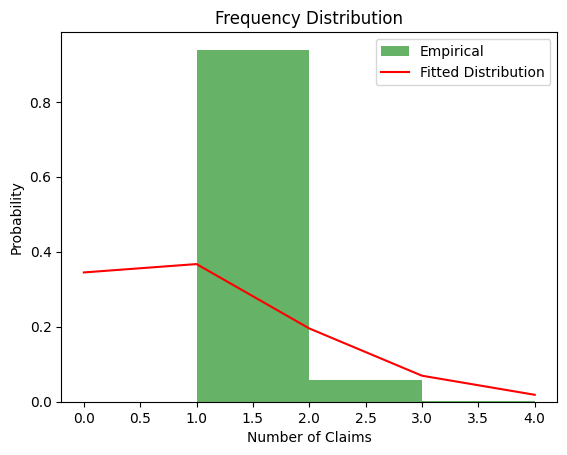

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

claim_data = pd.read_csv('claim_data_group5_2024.csv')
claim_data = claim_data.dropna()
claim_data = claim_data[(claim_data['ClaimNb'] >= 0) & (claim_data['ClaimAmount'] > 0)]  # Ensure ClaimAmount > 0
claim_frequency = claim_data['ClaimNb']
mean_claim_freq = claim_frequency.mean()
var_claim_freq = claim_frequency.var()
if var_claim_freq > mean_claim_freq:
    alpha_est = mean_claim_freq**2 / (var_claim_freq - mean_claim_freq)
    p_est = mean_claim_freq / var_claim_freq
else:
    alpha_est = mean_claim_freq
    p_est = 1.0

print("Estimated Negative Binomial parameters:")
print("Alpha (dispersion parameter):", alpha_est)
print("P (probability of success):", p_est)

# Plot 
plt.hist(claim_frequency, bins=range(0, int(claim_frequency.max()) + 1), density=True, alpha=0.6, color='g', label='Empirical')

x = np.arange(0, int(claim_frequency.max()) + 1)
if var_claim_freq > mean_claim_freq:
    fitted_nb = stats.nbinom.pmf(x, alpha_est, p_est)
else:
    fitted_nb = stats.poisson.pmf(x, alpha_est)
plt.plot(x, fitted_nb, 'r-', label='Fitted Distribution')

plt.title('Frequency Distribution')
plt.xlabel('Number of Claims')
plt.ylabel('Probability')
plt.legend()
plt.show()

Here we estimated the dispersion parameter Alpha, which is 1.0646657571623466, it shows there's a high tendency of dispersion but the alphais around 1 shows the distpersion is not extremely high. And the probality of success is 1.0 means it follows a poisson distribution.

 ### Simulated loss （Gamma）
 

According to the simulation, the average total expected loss in a year would be 2000.56 with a standard deviation of 3676.91, indicating a high degree of volatility in the total loss.

Estimated Gamma parameters for severity distribution:
Alpha: 0.77598083307877
Loc: 0
Beta: 2693.4142535413143


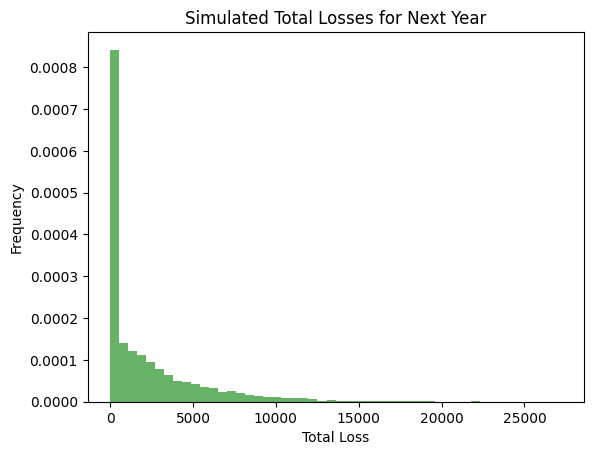

Simulated Total Losses - Mean: 2195.6363366800383
Simulated Total Losses - Std Dev: 3176.261629979459
KS Test for Gamma Distribution - Statistic: 0.24645803383389342 P-value: 1.5089949709438602e-196


In [ ]:
# Severity distribution
claim_severity = claim_data['ClaimAmount']
alpha_sev, loc_sev, beta_sev = stats.gamma.fit(claim_severity, floc=0)

print("Estimated Gamma parameters for severity distribution:")
print("Alpha:", alpha_sev)
print("Loc:", loc_sev)
print("Beta:", beta_sev)

# Simulate total losses for the next year
num_simulations = 10000
total_losses = []

for _ in range(num_simulations):
    if var_claim_freq > mean_claim_freq:
        simulated_claims = np.random.negative_binomial(alpha_est, p_est)
    else:
        simulated_claims = np.random.poisson(alpha_est)
    
   
    simulated_severity = np.random.gamma(alpha_sev, beta_sev, simulated_claims)
    
    #  total loss
    total_loss = simulated_severity.sum()
    total_losses.append(total_loss)

# Convert to numpy array
total_losses = np.array(total_losses)

# Plot 
plt.hist(total_losses, bins=50, density=True, alpha=0.6, color='g')
plt.title('Simulated Total Losses for Next Year')
plt.xlabel('Total Loss')
plt.ylabel('Frequency')
plt.show()
print("Simulated Total Losses - Mean:", total_losses.mean())
print("Simulated Total Losses - Std Dev:", total_losses.std())
ks_stat, p_value = stats.kstest(claim_severity, 'gamma', args=(alpha_sev, loc_sev, beta_sev))
print("KS Test for Gamma Distribution - Statistic:", ks_stat, "P-value:", p_value)

 ### Simulated loss (log-nomal) and check the best fit
 

Estimated Log-Normal parameters for severity distribution:
Shape: 1.1596764669034225
Loc: 0
Scale: 969.7229460522528


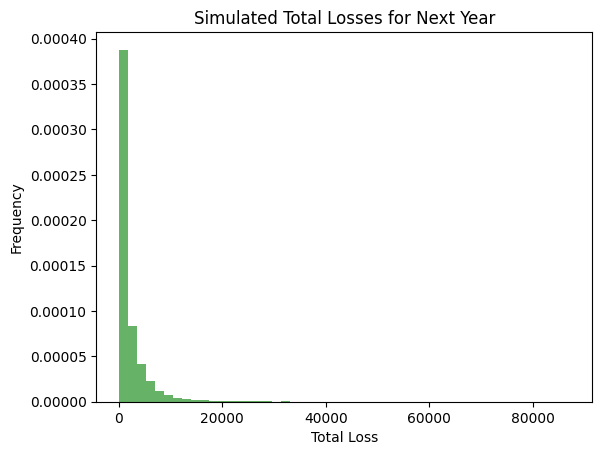

Simulated Total Losses - Mean: 2000.5555337452777
Simulated Total Losses - Std Dev: 3676.914082236124
KS Test for Log-Normal Distribution - Statistic: 0.2307185397172155 P-value: 5.315203177357836e-172
KS Test for Gamma Distribution - Statistic: 0.24645803383389342 P-value: 1.5089949709438602e-196
Best fit distribution: lognorm with parameters: (1.1596764669034225, 0, 969.7229460522528)


In [ ]:
# Estimate severity distribution (Log-Normal)
claim_severity = claim_data['ClaimAmount']
shape, loc, scale = stats.lognorm.fit(claim_severity, floc=0)

# Print estimated parameters
print("Estimated Log-Normal parameters for severity distribution:")
print("Shape:", shape)
print("Loc:", loc)
print("Scale:", scale)

# Simulate total losses for the next year
num_simulations = 10000
total_losses = []

for _ in range(num_simulations):

    if var_claim_freq > mean_claim_freq:
        simulated_claims = np.random.negative_binomial(alpha_est, p_est)
    else:
        simulated_claims = np.random.poisson(alpha_est)
    
    simulated_severity = np.random.lognormal(np.log(scale), shape, simulated_claims)
    total_loss = simulated_severity.sum()
    total_losses.append(total_loss)

# Convert to numpy array
total_losses = np.array(total_losses)

# Plot 
plt.hist(total_losses, bins=50, density=True, alpha=0.6, color='g')
plt.title('Simulated Total Losses for Next Year')
plt.xlabel('Total Loss')
plt.ylabel('Frequency')
plt.show()

# Print basic stats for simulated total losses
print("Simulated Total Losses - Mean:", total_losses.mean())
print("Simulated Total Losses - Std Dev:", total_losses.std())

# Goodness-of-fit test for Log-Normal distribution
ks_stat_lognorm, p_value_lognorm = stats.kstest(claim_severity, 'lognorm', args=(shape, loc, scale))
print("KS Test for Log-Normal Distribution - Statistic:", ks_stat_lognorm, "P-value:", p_value_lognorm)

# Compare 
alpha_sev, loc_sev, beta_sev = stats.gamma.fit(claim_severity, floc=0)
ks_stat_gamma, p_value_gamma = stats.kstest(claim_severity, 'gamma', args=(alpha_sev, loc_sev, beta_sev))
print("KS Test for Gamma Distribution - Statistic:", ks_stat_gamma, "P-value:", p_value_gamma)

# Choose the best fit based on p-value
if p_value_lognorm > p_value_gamma:
    best_fit = 'lognorm'
    best_params = (shape, loc, scale)
else:
    best_fit = 'gamma'
    best_params = (alpha_sev, loc_sev, beta_sev)

print(f"Best fit distribution: {best_fit} with parameters: {best_params}")

According to the simulation of log-nomal distribution, the average total expected loss in a year would be 2000.56 with a standard deviation of 3676.91 while the gamma ditribution is 2195.63 and 3176.26, indicating a high degree of volatility in the total loss.
From the results of the Kolmogorov-Smirnov test, the lognormal distribution performs better than the gamma distribution in fitting the data (higher p-value). Lognormal distribution has a statistic value of 0.2307 and gamma distribution has a statistic value of 0.2465, both having lower P-value, which indicates that despite the fact that both are imperfect, the lognormal distribution has a relatively better fit .



## 3. Premium Determination: Assign appropriate premiums to each risk group, ensuring that the likelihood of not being able to cover claims next year does not exceed 0.5%.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [3]:
claim_data = pd.read_csv('claim_data_group5_2024.csv')
claim_data.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,2271893.0,0.0,0.83,E,5.0,17.0,53.0,64.0,B2,Diesel,3317.0,R93,0.0
1,1111864.0,0.0,0.24,E,5.0,2.0,27.0,64.0,B3,Diesel,2740.0,R22,0.0
2,72908.0,0.0,0.50,E,7.0,11.0,67.0,50.0,B3,Regular,4762.0,R93,0.0
3,2283027.0,0.0,0.08,B,5.0,8.0,28.0,60.0,B1,Diesel,64.0,R91,0.0
4,1123838.0,0.0,0.03,A,11.0,1.0,38.0,50.0,B2,Regular,16.0,R24,0.0


In [4]:
# Define driver age categories and vehicle power levels as risk group identifiers
claim_data['DrivAgeGroup'] = pd.cut(claim_data['DrivAge'], bins=[18, 25, 35, 50, 65, 100], labels=['18-25', '26-35', '36-50', '51-65', '65+'])
claim_data['RiskGroup'] = claim_data['DrivAgeGroup'].astype(str) + "_" + claim_data['VehPower'].astype(str)


In [5]:
# Calculate claim frequency and severity per risk group
risk_group_stats = claim_data.groupby('RiskGroup').agg(
    frequency=('ClaimNb', 'mean'),  # Average claims per policy
    severity=('ClaimAmount', lambda x: x[x > 0].mean())  # Average claim amount for policies with claims
).fillna(0)  # Replace NaN values with 0 for groups with no claims

risk_group_stats.reset_index(inplace=True)
risk_group_stats.head()


,RiskGroup,frequency,severity
0,18-25_10.0,0.036036,718.7925
1,18-25_11.0,0.122449,1235.8700
2,18-25_12.0,0.000000,0.0000
3,18-25_13.0,0.000000,0.0000
4,18-25_14.0,0.187500,746.7100


In [6]:
# Calculate expected loss for each risk group
risk_group_stats['expected_loss'] = risk_group_stats['frequency'] * risk_group_stats['severity']
risk_group_stats.head()


,RiskGroup,frequency,severity,expected_loss
0,18-25_10.0,0.036036,718.7925,25.902432
1,18-25_11.0,0.122449,1235.8700,151.331020
2,18-25_12.0,0.000000,0.0000,0.000000
3,18-25_13.0,0.000000,0.0000,0.000000
4,18-25_14.0,0.187500,746.7100,140.008125


In [7]:
# Assume a buffer multiplier based on 99.5% confidence using the normal distribution (z-score ~2.576)
z_score_99_5 = norm.ppf(0.995)

# Estimate premium as expected loss plus buffer
risk_group_stats['premium'] = risk_group_stats['expected_loss'] * (1 + z_score_99_5)
risk_group_stats[['RiskGroup', 'frequency', 'severity', 'expected_loss', 'premium']]


,RiskGroup,frequency,severity,expected_loss,premium
0,18-25_10.0,0.036036,718.7925,25.902432,92.622677
1,18-25_11.0,0.122449,1235.8700,151.331020,541.133897
2,18-25_12.0,0.000000,0.0000,0.000000,0.000000
3,18-25_13.0,0.000000,0.0000,0.000000,0.000000
4,18-25_14.0,0.187500,746.7100,140.008125,500.645156
...,...,...,...,...,...
64,nan_5.0,0.071429,3878.8050,277.057500,990.710327
65,nan_6.0,0.000000,0.0000,0.000000,0.000000
66,nan_7.0,0.130435,2087.5300,272.286522,973.650123
67,nan_8.0,0.000000,0.0000,0.000000,0.000000


In [8]:
# Display the final risk group statistics with calculated premiums
print(risk_group_stats[['RiskGroup', 'frequency', 'severity', 'expected_loss', 'premium']])


     RiskGroup  frequency   severity  expected_loss     premium
0   18-25_10.0   0.036036   718.7925      25.902432   92.622677
1   18-25_11.0   0.122449  1235.8700     151.331020  541.133897
2   18-25_12.0   0.000000     0.0000       0.000000    0.000000
3   18-25_13.0   0.000000     0.0000       0.000000    0.000000
4   18-25_14.0   0.187500   746.7100     140.008125  500.645156
..         ...        ...        ...            ...         ...
64     nan_5.0   0.071429  3878.8050     277.057500  990.710327
65     nan_6.0   0.000000     0.0000       0.000000    0.000000
66     nan_7.0   0.130435  2087.5300     272.286522  973.650123
67     nan_8.0   0.000000     0.0000       0.000000    0.000000
68     nan_9.0   0.000000     0.0000       0.000000    0.000000

[69 rows x 5 columns]
